###SVM & Naive bayes
###Theoretical


1. What is a Support Vector Machine (SVM)?
- A **Support Vector Machine (SVM)** is a supervised machine learning algorithm primarily used for **classification** tasks, although it can also be used for **regression**.

### Core Idea:

SVM finds the **optimal hyperplane** that best separates data points of different classes in a high-dimensional space.

---

### Key Concepts:

#### 1. **Hyperplane**:

* A decision boundary that separates different classes.
* In 2D, it's a line; in 3D, a plane; in higher dimensions, it's a hyperplane.

#### 2. **Margin**:

* The distance between the hyperplane and the **closest data points** from each class.
* SVM aims to **maximize this margin** to improve generalization.

#### 3. **Support Vectors**:

* The **data points that lie closest to the hyperplane**.
* They "support" or define the position and orientation of the hyperplane.

---

### Types of SVM:

#### 1. **Linear SVM**:

* Used when data is linearly separable.

#### 2. **Non-Linear SVM**:

* Uses **kernel functions** to map data into a higher-dimensional space where it can be linearly separated.

---

### Common Kernels:

* **Linear**: No transformation.
* **Polynomial**: Captures polynomial relationships.
* **Radial Basis Function (RBF/Gaussian)**: Captures more complex, non-linear patterns.
* **Sigmoid**: Similar to neural networks.

---

### Advantages:

* Effective in high-dimensional spaces.
* Works well with a clear margin of separation.
* Robust to overfitting in high-dimensional space.

---

### Disadvantages:

* Not well-suited to large datasets (slow training).
* Less effective when there is a lot of noise or overlapping classes.
* Choosing the right kernel and tuning parameters (like C and gamma) can be tricky.

---

### Use Cases:

* Image classification
* Text categorization
* Bioinformatics (e.g., cancer classification)
* Handwriting recognition



2. What is the difference between Hard Margin and Soft Margin SVM?
- The difference between **Hard Margin** and **Soft Margin** SVM lies in how they handle data that is **not perfectly linearly separable**:

---

### ✅ **Hard Margin SVM**

* **Assumes data is perfectly linearly separable** (no overlap between classes).
* Finds a **maximum margin hyperplane** that **strictly separates** the classes with **no misclassifications**.
* **No tolerance** for errors or outliers.

#### Pros:

* Simpler model if perfect separation exists.

#### Cons:

* **Fails** if data is **not perfectly separable**.
* **Very sensitive** to outliers (even one outlier can ruin the model).

---

### ✅ **Soft Margin SVM**

* Introduced to handle **non-linearly separable data** and **outliers**.
* Allows **some misclassification** by introducing a **slack variable (ξ)**.
* Balances the trade-off between maximizing the margin and minimizing the classification error.

#### Controlled by a parameter:

* **C (Regularization parameter)**:

  * High C: Low tolerance for misclassification (behaves more like hard margin).
  * Low C: More tolerance for misclassification (wider margin, potentially better generalization).

#### Pros:

* More **robust** and **realistic** for noisy or overlapping data.
* Can still perform well even when classes are not perfectly separable.

#### Cons:

* Requires tuning of the **C** parameter.
* Slightly more complex to implement.

---

### 🔍 Summary Table:

| Feature             | Hard Margin SVM                 | Soft Margin SVM            |
| ------------------- | ------------------------------- | -------------------------- |
| Data separability   | Assumes perfect separation      | Allows overlap/noisy data  |
| Misclassification   | Not allowed                     | Allowed (penalized)        |
| Robustness to noise | Poor                            | Good                       |
| Use case            | Ideal for clean, separable data | Real-world, noisy data     |
| Parameter involved  | None                            | C (controls error penalty) |

---



3. What is the mathematical intuition behind SVM?
- The mathematical intuition behind **SVM** (Support Vector Machine) — including its **hard** and **soft margin** versions — revolves around the idea of **finding the optimal separating hyperplane** that maximizes the **margin** between two classes of data points.

Let’s break it down:

---

### 🔢 1. **Goal** of SVM:

Find a hyperplane:

$$
\mathbf{w}^T \mathbf{x} + b = 0
$$

that separates two classes **with the largest possible margin**, while **minimizing classification error** (in the soft-margin case).

---

### 📏 2. **Margin and Support Vectors**:

* Margin = Distance from the hyperplane to the closest data point.
* For a normalized hyperplane, the **margin** is:

$$
\text{Margin} = \frac{2}{\|\mathbf{w}\|}
$$

* So, **maximizing the margin** = **minimizing** $\|\mathbf{w}\|^2$.

---

### ✅ 3. **Hard Margin SVM (Linearly Separable Case)**

Given labeled data:

$$
(\mathbf{x}_i, y_i) \text{ where } y_i \in \{-1, +1\}
$$

**Objective:**

$$
\min_{\mathbf{w}, b} \quad \frac{1}{2} \|\mathbf{w}\|^2
$$

**Subject to:**

$$
y_i (\mathbf{w}^T \mathbf{x}_i + b) \geq 1 \quad \text{for all } i
$$

This ensures:

* All data points are classified correctly.
* They lie outside the margin.

---

### ✅ 4. **Soft Margin SVM (Non-Separable Case)**

We allow some slack (ξ) to handle misclassifications.

**Objective:**

$$
\min_{\mathbf{w}, b, \xi} \quad \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{n} \xi_i
$$

**Subject to:**

$$
y_i (\mathbf{w}^T \mathbf{x}_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0
$$

Where:

* $\xi_i$: Slack variable measuring how much the constraint is violated.
* $C$: Regularization parameter controlling the trade-off between margin size and classification error.

---

### 🧠 Intuition Summary:

* We want to **maximize the margin** (make the model generalize well).
* But in the **real world**, data might **not be perfectly separable**, so we allow for some violations using **slack variables**.
* The regularization parameter $C$ controls how much violation we tolerate:

  * Large $C$: Penalizes misclassification more (harder on errors).
  * Small $C$: Allows a softer margin (more tolerance, better generalization).

---

### 📌 Optional: Dual Form and Kernels

* SVMs are often solved in their **dual form** using Lagrange multipliers.
* This allows the use of **kernel functions** to compute inner products in high-dimensional spaces, enabling **non-linear classification**.



4. What is the role of Lagrange Multipliers in SVM?
- Lagrange multipliers play a **central role in solving the optimization problem** in SVMs, especially when transitioning to the **dual form** of the problem. This dual formulation is crucial for:

* Efficient computation,
* Enabling the use of **kernel functions** for non-linear classification,
* Identifying **support vectors**.

---

### 📌 The Problem Setup (Recap)

#### Primal Form of Hard-Margin SVM:

$$
\min_{\mathbf{w}, b} \quad \frac{1}{2} \|\mathbf{w}\|^2
$$

Subject to:

$$
y_i(\mathbf{w}^T \mathbf{x}_i + b) \geq 1, \quad \forall i
$$

This is a **constrained optimization** problem — a perfect fit for **Lagrange multipliers**.

---

### 🧮 Role of Lagrange Multipliers

We use Lagrange multipliers $\alpha_i \geq 0$ to enforce the inequality constraints:

$$
y_i(\mathbf{w}^T \mathbf{x}_i + b) - 1 \geq 0
$$

Construct the **Lagrangian**:

$$
L(\mathbf{w}, b, \boldsymbol{\alpha}) = \frac{1}{2} \|\mathbf{w}\|^2 - \sum_{i=1}^n \alpha_i [y_i(\mathbf{w}^T \mathbf{x}_i + b) - 1]
$$

---

### 🔄 Dual Problem (Why It’s Useful)

Instead of solving the primal problem directly, we:

1. Take derivatives of $L$ w\.r.t. $\mathbf{w}$ and $b$,
2. Set them to 0 (stationary points),
3. Plug back into the Lagrangian to get the **dual problem** (in terms of $\alpha_i$ only):

$$
\max_{\boldsymbol{\alpha}} \sum_{i=1}^{n} \alpha_i - \frac{1}{2} \sum_{i,j=1}^{n} \alpha_i \alpha_j y_i y_j (\mathbf{x}_i^T \mathbf{x}_j)
$$

Subject to:

$$
\sum_{i=1}^{n} \alpha_i y_i = 0, \quad \alpha_i \geq 0
$$

This is a **quadratic programming** (QP) problem.

---

### ✅ Benefits of Using Lagrange Multipliers in SVM:

| Benefit                           | Explanation                                                                                                                                       |
| --------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Support Vector Identification** | Only data points with $\alpha_i > 0$ are **support vectors**.                                                                                     |
| **Efficient Computation**         | Dual form allows efficient optimization, especially with kernels.                                                                                 |
| **Kernel Trick**                  | Inner products $\mathbf{x}_i^T \mathbf{x}_j$ can be replaced with **kernel functions** $K(\mathbf{x}_i, \mathbf{x}_j)$, enabling non-linear SVMs. |
| **Strong Duality**                | For convex problems like SVM, solving the dual gives the same solution as the primal.                                                             |

---

### 🧠 Intuition

Think of Lagrange multipliers $\alpha_i$ as **weights** indicating how "important" each data point is in defining the decision boundary. Most $\alpha_i$ will be zero — only the **support vectors** have non-zero values.

---




5. What are Support Vectors in SVM?
- **Support Vectors** in Support Vector Machines (SVM) are the **most critical data points** in the training set. They lie **closest to the decision boundary (hyperplane)** and are the ones that directly **influence the position and orientation** of that boundary.

---

### 🧠 **Intuition**

Imagine you’re separating two classes with a line (in 2D) or a hyperplane (in higher dimensions). The **"tightest" points** on either side — the ones right up against the margin — are the support vectors.

If you **remove a support vector**, the optimal hyperplane **will change**. But if you remove a non-support vector, the hyperplane **remains unchanged**.

---

### 📏 Formally:

In the dual formulation of SVM, you solve for the Lagrange multipliers $\alpha_i$. The **support vectors** are those data points for which:

$$
\alpha_i > 0
$$

* These points **satisfy** the constraint:

  $$
  y_i(\mathbf{w}^T \mathbf{x}_i + b) = 1 \quad \text{(lie on the margin)}
  $$

---

### 🧱 Characteristics of Support Vectors:

| Property                                       | Description                                                               |
| ---------------------------------------------- | ------------------------------------------------------------------------- |
| Lie closest to the hyperplane                  | They are on or within the margin boundary.                                |
| Non-zero Lagrange multipliers ($\alpha_i > 0$) | Only these influence the solution.                                        |
| Define the margin                              | The hyperplane is chosen to **maximize the margin** between these points. |
| Robust to non-support points                   | Removing other points doesn’t affect the decision boundary.               |

---

### 🔍 Visual Insight (2D Case):

```
Class A: O
Class B: X

 O   O       |
      \      |  <- margin
       \     |
--------\----|----> hyperplane
       /     |
      /      |  <- margin
 X   X       |
```

The **O** and **X** closest to the hyperplane are the **support vectors**.

---

### 📈 Role in Generalization:

* Support vectors are the **only points used** to define the model — they carry all the "learning" from the data.
* SVM’s ability to generalize well is partially due to this **reliance on a small, influential subset** of the data.

---



6. What is a Support Vector Classifier (SVC)?
- A **Support Vector Classifier (SVC)** is the **practical implementation of the Support Vector Machine (SVM)** algorithm used specifically for **classification** tasks.

---

### 🔍 Definition:

The **Support Vector Classifier** is a **soft-margin SVM** model that finds the best decision boundary between classes by **maximizing the margin** while allowing for some **misclassification** of training points (via slack variables).

It’s especially useful when:

* Data is **not perfectly linearly separable**.
* You want to **balance accuracy with model generalization**.

---

### 🔢 Mathematically:

SVC solves this optimization problem:

$$
\min_{\mathbf{w}, b, \xi} \quad \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{n} \xi_i
$$

Subject to:

$$
y_i (\mathbf{w}^T \mathbf{x}_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0
$$

Where:

* $\mathbf{x}_i$: Input features
* $y_i \in \{-1, 1\}$: Class labels
* $\xi_i$: Slack variable (how much a point violates the margin)
* $C$: Regularization parameter (controls trade-off between margin width and misclassification)

---

### 🧠 Intuition:

* SVC tries to **separate classes with a wide margin**, but will **tolerate some misclassifications** if it improves generalization.
* It’s especially useful in real-world datasets where perfect separation is **not possible** due to noise or overlapping classes.

---

### 🛠️ In Practice (e.g., in Python using `scikit-learn`):

```python
from sklearn.svm import SVC

# Create classifier
clf = SVC(kernel='linear', C=1.0)

# Train it
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)
```

---

### 🔁 Kernels and SVC:

SVC can also perform **non-linear classification** using kernel tricks:

* `kernel='linear'` for linear SVC
* `kernel='rbf'` for Radial Basis Function (Gaussian)
* `kernel='poly'` for polynomial decision boundaries

---

### ✅ Summary:

| Feature           | Description                               |
| ----------------- | ----------------------------------------- |
| SVC               | SVM used for classification               |
| Margin            | Maximized, but soft (slack allowed)       |
| Misclassification | Allowed, penalized via $C$                |
| Kernel support    | Yes (linear, RBF, poly, sigmoid)          |
| Real-world use    | Works well with noisy or overlapping data |

---



7. What is a Support Vector Regressor (SVR)?
- A **Support Vector Regressor (SVR)** is the **regression version** of Support Vector Machines (SVM). Instead of classifying data, it aims to **predict a continuous value** by fitting a function within a certain **margin of tolerance** (ε).

---

### 🎯 **Objective of SVR:**

SVR tries to find a function $f(x)$ that **deviates from the actual target values by at most** $\varepsilon$, while being as **flat** as possible.

---

### 🧮 **Mathematical Formulation:**

SVR tries to solve:

$$
\min_{\mathbf{w}, b, \xi, \xi^*} \quad \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{n} (\xi_i + \xi_i^*)
$$

**Subject to:**

$$
\begin{aligned}
y_i - (\mathbf{w}^T \mathbf{x}_i + b) &\leq \varepsilon + \xi_i \\
(\mathbf{w}^T \mathbf{x}_i + b) - y_i &\leq \varepsilon + \xi_i^* \\
\xi_i, \xi_i^* &\geq 0
\end{aligned}
$$

---

### 🔍 Explanation of Terms:

| Symbol           | Meaning                                                                                     |
| ---------------- | ------------------------------------------------------------------------------------------- |
| $\mathbf{w}$     | Weights (slope of the regression line)                                                      |
| $b$              | Bias (intercept)                                                                            |
| $\varepsilon$    | Tube width (acceptable margin of error)                                                     |
| $\xi_i, \xi_i^*$ | Slack variables (penalties for errors beyond $\varepsilon$)                                 |
| $C$              | Regularization parameter controlling trade-off between flatness and tolerance to deviations |

---

### 🧠 **Intuition:**

* **Flatness:** Minimize $\|\mathbf{w}\|^2$ → simpler model.
* **ε-insensitive zone:** Errors within ±ε are ignored (free zone).
* **Outside errors:** Penalized via slack variables $\xi_i, \xi_i^*$.

---

### 📈 **Visualization:**

Imagine fitting a **tube** around your data:

```
   |             *
   |        *       *       <- ε-margin (tube)
---+---------------------
   |        *       *
   |             *
```

SVR finds a **flat function (line/curve)** that fits most points **within the ε-tube** and minimizes errors outside the tube.

---

### 🛠️ **In Practice (Python using `scikit-learn`):**

```python
from sklearn.svm import SVR

model = SVR(kernel='rbf', C=100, epsilon=0.1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
```

---

### ✅ **Key Features of SVR:**

| Feature            | Description                            |
| ------------------ | -------------------------------------- |
| Output type        | Continuous value (regression)          |
| ε-insensitive loss | Ignores small errors inside the tube   |
| Slack variables    | Penalize large deviations              |
| Regularization (C) | Controls overfitting vs. margin errors |
| Kernel support     | Linear, RBF, Polynomial, etc.          |

---


8. What is the Kernel Trick in SVM4?
- The **Kernel Trick** is a powerful technique in **Support Vector Machines (SVM)** that allows the algorithm to **perform non-linear classification or regression** by implicitly mapping the input data into a **higher-dimensional space**, without ever computing that mapping explicitly.

---

### 🎯 **Purpose of the Kernel Trick**

SVMs are inherently linear models. The kernel trick allows them to:

* Handle **non-linearly separable data**.
* Find complex decision boundaries **efficiently**.

---

### 🔍 **How It Works:**

Instead of mapping data $\mathbf{x}$ into a high-dimensional feature space $\phi(\mathbf{x})$ and then computing the dot product $\phi(\mathbf{x}_i)^T \phi(\mathbf{x}_j)$, the kernel trick uses a **kernel function**:

$$
K(\mathbf{x}_i, \mathbf{x}_j) = \phi(\mathbf{x}_i)^T \phi(\mathbf{x}_j)
$$

This avoids explicitly computing $\phi(\mathbf{x})$, which can be computationally expensive or even infinite-dimensional.

---

### 🧠 **Intuition:**

* In original (low-dimensional) space, data might not be separable.
* In a higher-dimensional space, the data becomes **linearly separable**.
* The kernel trick lets SVM work in that high-dimensional space **without ever going there explicitly**.

---

### 🧪 **Popular Kernel Functions:**

| Kernel Type        | Formula                                                                              | Use Case Example                   |
| ------------------ | ------------------------------------------------------------------------------------ | ---------------------------------- |
| **Linear**         | $K(\mathbf{x}, \mathbf{y}) = \mathbf{x}^T \mathbf{y}$                                | Linearly separable data            |
| **Polynomial**     | $K(\mathbf{x}, \mathbf{y}) = (\mathbf{x}^T \mathbf{y} + c)^d$                        | Polynomial decision boundaries     |
| **RBF / Gaussian** | $K(\mathbf{x}, \mathbf{y}) = \exp\left(-\gamma \|\mathbf{x} - \mathbf{y}\|^2\right)$ | Non-linear separation, general use |
| **Sigmoid**        | $K(\mathbf{x}, \mathbf{y}) = \tanh(\alpha \mathbf{x}^T \mathbf{y} + c)$              | Similar to neural networks         |

---

### 💡 **Why It’s Useful:**

| Advantage                    | Description                             |
| ---------------------------- | --------------------------------------- |
| **Non-linear separation**    | Enables SVM to model complex boundaries |
| **Computational efficiency** | Avoids expensive transformations        |
| **Flexibility**              | You can tailor the kernel to your data  |

---

### 🧪 **In Practice (Python `scikit-learn`):**

```python
from sklearn.svm import SVC

# Using RBF kernel (default)
clf = SVC(kernel='rbf', C=1.0, gamma='scale')
clf.fit(X_train, y_train)
```

---

### ✅ **Summary:**

* The **Kernel Trick** allows SVM to operate in high-dimensional spaces **without explicitly transforming the data**.
* This enables **non-linear decision boundaries** using only inner products computed through kernel functions.

9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel?
- Here's a detailed **comparison of the Linear, Polynomial, and RBF (Radial Basis Function) kernels** commonly used in **Support Vector Machines (SVM)**:

---

### 🔍 **1. Linear Kernel**

**Formula:**

$$
K(\mathbf{x}, \mathbf{y}) = \mathbf{x}^T \mathbf{y}
$$

**Use Case:**

* Data that is **linearly separable**.
* High-dimensional data (e.g., text classification, document analysis).

**Pros:**

* Simple and fast.
* Easy to interpret.
* Few hyperparameters to tune.

**Cons:**

* Cannot model non-linear relationships.

---

### 🔍 **2. Polynomial Kernel**

**Formula:**

$$
K(\mathbf{x}, \mathbf{y}) = (\mathbf{x}^T \mathbf{y} + c)^d
$$

Where:

* $c$: constant term (typically ≥ 0)
* $d$: degree of the polynomial

**Use Case:**

* Data with **polynomial relationships**.
* When you want to capture **interactions** between features.

**Pros:**

* Adds flexibility over the linear kernel.
* Can model moderately complex decision boundaries.

**Cons:**

* More sensitive to hyperparameters (degree, c).
* Can overfit for high-degree values.

---

### 🔍 **3. RBF (Radial Basis Function / Gaussian) Kernel**

**Formula:**

$$
K(\mathbf{x}, \mathbf{y}) = \exp\left(-\gamma \|\mathbf{x} - \mathbf{y}\|^2\right)
$$

Where:

* $\gamma$: controls the influence of each training example

**Use Case:**

* **Non-linearly separable** data.
* General-purpose kernel; often performs well with default settings.

**Pros:**

* Very flexible and powerful.
* Handles complex, non-linear relationships well.

**Cons:**

* Less interpretable.
* Requires tuning of $\gamma$ and $C$.
* Risk of overfitting if $\gamma$ is too large.

---

### 📊 **Comparison Table**

| Feature                 | Linear Kernel                       | Polynomial Kernel                         | RBF Kernel                                    |
| ----------------------- | ----------------------------------- | ----------------------------------------- | --------------------------------------------- |
| **Formula**             | $\mathbf{x}^T \mathbf{y}$           | $(\mathbf{x}^T \mathbf{y} + c)^d$         | $\exp(-\gamma \|\mathbf{x} - \mathbf{y}\|^2)$ |
| **Captures**            | Linear patterns                     | Polynomial feature interactions           | Complex non-linear relationships              |
| **Hyperparameters**     | None or $C$                         | $C, d, c$                                 | $C, \gamma$                                   |
| **Risk of Overfitting** | Low                                 | Medium–High (especially with high degree) | High (if $\gamma$ is too large)               |
| **Speed**               | Fast                                | Moderate                                  | Slower                                        |
| **Interpretability**    | High                                | Medium                                    | Low                                           |
| **Best For**            | Linearly separable or high-dim data | Moderate complexity relationships         | Most real-world, non-linear datasets          |

---

### ✅ **Quick Guidelines:**

* Use **Linear** if:

  * Your data is high-dimensional (e.g. text).
  * You suspect a simple separation is sufficient.

* Use **Polynomial** if:

  * You believe there are significant feature interactions.
  * You want more complexity than linear but not as much as RBF.

* Use **RBF** if:

  * You expect **complex non-linear** relationships.
  * You're unsure — RBF is a strong default choice.

---



10.  What is the effect of the C parameter in SVM?
- The **`C` parameter** in **SVM (Support Vector Machine)** plays a **crucial role in controlling the trade-off between model complexity and training error**. It appears in both **Support Vector Classifier (SVC)** and **Support Vector Regressor (SVR)**.

---

### 🎯 **Core Idea:**

The `C` parameter is a **regularization parameter**. It controls **how much you want to avoid misclassifying training examples** (or allow error in regression).

---

### 📉 In Classification (SVC):

#### 🧮 Optimization Objective:

$$
\min_{\mathbf{w}, b, \xi} \quad \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{n} \xi_i
$$

Where:

* $\|\mathbf{w}\|^2$: margin maximization (simplicity),
* $\sum \xi_i$: total amount of margin violation (misclassification),
* $C$: balances the two.

---

### 🔁 **Effect of C in Classification (SVC):**

| Value of `C` | Behavior                                                                                | Outcome                                    |
| ------------ | --------------------------------------------------------------------------------------- | ------------------------------------------ |
| **Large C**  | High penalty for misclassification → model tries to **fit the training data very well** | May **overfit** and have **narrow margin** |
| **Small C**  | Allows more misclassifications → model focuses more on **margin maximization**          | May **underfit** but **generalize better** |

---

### 📊 Example:

* `C = 1000`: "Hard margin" — very strict, no tolerance for errors.
* `C = 0.01`: "Soft margin" — very lenient, prioritizes generalization.

---

### 📉 In Regression (SVR):

In SVR, `C` controls the **penalty for predictions that fall outside the ε-insensitive margin**.

* **High C**: Penalizes large errors more → model fits training data tightly.
* **Low C**: Tolerates larger deviations → smoother, simpler model.

---

### 🧠 **Analogy:**

Think of `C` as the **strictness level** of the SVM:

* High `C` = strict teacher (punishes every mistake),
* Low `C` = lenient teacher (focuses on understanding, not perfection).

---

### ✅ Summary Table:

| Parameter | High Value Effect                             | Low Value Effect                               |
| --------- | --------------------------------------------- | ---------------------------------------------- |
| **C**     | Low bias, high variance (risk of overfitting) | High bias, low variance (risk of underfitting) |

---



11. What is the role of the Gamma parameter in RBF Kernel SVM?
-
In an **RBF (Radial Basis Function) Kernel SVM**, the **gamma (γ)** parameter plays a crucial role in how the decision boundary is shaped. Here's a clear breakdown:

---

### 🔍 **What Gamma Controls**

* Gamma defines **how far the influence of a single training example reaches**.
* It controls the **shape** of the RBF kernel function:

  $$
  K(x_i, x_j) = \exp(-\gamma \|x_i - x_j\|^2)
  $$

---

### 🧠 **Intuition**

* **Low gamma** → **Wide reach**:
  Each training point has a **large influence**. The model is **smoother** and more generalized.
* **High gamma** → **Narrow reach**:
  Each point has **localized influence**. The model can **fit very closely** to the training data (risk of **overfitting**).

---

### 🎯 **Impact on Model Behavior**

| Gamma Value | Influence Radius | Effect on Model                     | Risk         |
| ----------- | ---------------- | ----------------------------------- | ------------ |
| Low         | Large            | Simpler, smoother decision boundary | Underfitting |
| High        | Small            | Complex, flexible decision boundary | Overfitting  |

---

### ⚖️ **Best Practice**

* Use **grid search** or **cross-validation** to find the optimal gamma:

  ```python
  from sklearn.model_selection import GridSearchCV
  from sklearn.svm import SVC

  param_grid = {
      'gamma': [0.01, 0.1, 1, 10],
      'C': [0.1, 1, 10, 100]
  }

  grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
  grid.fit(X_train, y_train)
  ```

---



12.  What is the Naïve Bayes classifier, and why is it called "Naïve"?
- ### 🤖 What is the **Naïve Bayes Classifier**?

The **Naïve Bayes classifier** is a **probabilistic machine learning algorithm** based on **Bayes’ Theorem**. It's mainly used for **classification tasks**, especially when dealing with **text data**, like spam detection or sentiment analysis.

---

### 📘 Bayes’ Theorem (Recap)

Bayes’ Theorem describes the probability of a class $C$ given some feature data $X$:

$$
P(C|X) = \frac{P(X|C) \cdot P(C)}{P(X)}
$$

* $P(C|X)$: Posterior – the probability of class $C$ given features $X$
* $P(X|C)$: Likelihood – probability of features given class
* $P(C)$: Prior – overall probability of class
* $P(X)$: Evidence – overall probability of features

---

### 🧠 Why is it called **"Naïve"**?

The algorithm is called **naïve** because it **assumes that all features are conditionally independent**, **given the class**.

#### Example:

If you're classifying an email as spam or not spam:

* Features might include presence of certain words.
* Naïve Bayes assumes that the presence of one word is **independent** of the presence of another — **which is rarely true in real life.**

👉 Despite this unrealistic assumption, **it works surprisingly well** in practice — especially for high-dimensional data like text.

---

### 📌 Summary

| Feature            | Description                                                                |
| ------------------ | -------------------------------------------------------------------------- |
| **Model type**     | Probabilistic                                                              |
| **Key assumption** | Conditional independence of features                                       |
| **Why "naïve"**    | Assumes features don’t influence each other (independent given the class)  |
| **Use cases**      | Text classification, spam detection, sentiment analysis, medical diagnosis |

---


13. What is Bayes’ Theorem?
- ### 📘 What is **Bayes' Theorem**?

**Bayes’ Theorem** is a fundamental concept in probability theory used to **update the probability** of a hypothesis as more evidence or information becomes available.

---

### 🔍 **The Formula**

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

Where:

| Term   | Meaning                                |                                          |
| ------ | -------------------------------------- | ---------------------------------------- |
| ( P(A  | B) )                                   | Posterior: Probability of **A given B**  |
| ( P(B  | A) )                                   | Likelihood: Probability of **B given A** |
| $P(A)$ | Prior: Initial belief/probability of A |                                          |
| $P(B)$ | Evidence: Overall probability of B     |                                          |

---

### 🧠 **In Plain Language**

Bayes' Theorem tells us **how to revise our beliefs** (probabilities) based on **new evidence**.

---

### 🎯 **Real-Life Example**

#### Medical Diagnosis:

* **A**: Patient has a disease
* **B**: Patient tests positive

We want to know:

> What is the probability the patient **has the disease given** a **positive test result**?

Bayes’ Theorem helps calculate that by factoring in:

* How common the disease is (prior)
* How accurate the test is (likelihood)
* How often the test gives positives (evidence)

---

### 🧪 Simple Numerical Example

Suppose:

* 1% of people have a disease → $P(A) = 0.01$
* Test is 99% accurate → $P(B|A) = 0.99$, $P(B|\text{no }A) = 0.05$

$$
P(A|B) = \frac{0.99 \cdot 0.01}{0.99 \cdot 0.01 + 0.05 \cdot 0.99}
\approx 0.17
$$

Even with a positive test, there's only a **17% chance** the person actually has the disease — because the disease is rare.

---

### ✅ Summary

| Concept      | Description                                       |
| ------------ | ------------------------------------------------- |
| **Purpose**  | Update belief based on new evidence               |
| **Used in**  | Machine learning, medicine, spam filters, finance |
| **Strength** | Connects prior knowledge with observed data       |

---




14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes?
- ### 📊 Differences Between Naïve Bayes Variants

Naïve Bayes has **multiple types**, each suited to different kinds of data. The **three most commonly used** are:

---

## 🔹 1. **Gaussian Naïve Bayes**

### ✔️ Best For:

* **Continuous numerical features** (e.g., height, weight, test scores)

### 🧪 Assumption:

* Features follow a **normal (Gaussian) distribution** for each class.

### 📘 Formula:

$$
P(x_i | y) = \frac{1}{\sqrt{2\pi\sigma_y^2}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma_y^2}\right)
$$

### ✅ Use Case:

* **Iris dataset**
* Medical data with measurements

---

## 🔹 2. **Multinomial Naïve Bayes**

### ✔️ Best For:

* **Count data**, like word frequencies in documents

### 🧪 Assumption:

* Features are **discrete** and represent **counts or frequencies**.

### 📘 Formula (simplified likelihood):

$$
P(x_i | y) = \frac{N_{yi} + \alpha}{N_y + \alpha n}
$$

Where $N_{yi}$ is the count of feature $i$ in class $y$, and $\alpha$ is the smoothing parameter.

### ✅ Use Case:

* **Text classification**, spam detection, document categorization

---

## 🔹 3. **Bernoulli Naïve Bayes**

### ✔️ Best For:

* **Binary/boolean features** (0 or 1: word present or not)

### 🧪 Assumption:

* Features are **binary** (not counts). Either a feature is present or not.

### 📘 Formula:

$$
P(x_i | y) = p^{x_i}(1 - p)^{1 - x_i}
$$

### ✅ Use Case:

* Text data as binary features (e.g., “word present?”)
* Email spam detection with a bag-of-words presence model

---

### 📋 Summary Table

| Variant         | Feature Type    | Distribution Assumption     | Common Use Case                   |
| --------------- | --------------- | --------------------------- | --------------------------------- |
| **Gaussian**    | Continuous      | Normal (Gaussian)           | Medical data, sensor readings     |
| **Multinomial** | Discrete counts | Multinomial                 | Text classification (word counts) |
| **Bernoulli**   | Binary (0 or 1) | Bernoulli (binary outcomes) | Spam detection, word presence     |

---



15. When should you use Gaussian Naïve Bayes over other variants?
-
### ❓ When Should You Use **Gaussian Naïve Bayes** Over Other Variants?

Use **Gaussian Naïve Bayes** when your **input features are continuous numerical values** that are **assumed to follow a normal (Gaussian) distribution**.

---

### ✅ **Ideal Conditions for Gaussian Naïve Bayes**

| Criterion                            | Why It Matters                                            |
| ------------------------------------ | --------------------------------------------------------- |
| **Numerical (continuous) data**      | It assumes features are drawn from a normal distribution. |
| **Features are real-valued**         | e.g., height, weight, age, income, exam scores.           |
| **Low correlation between features** | Matches the Naïve Bayes independence assumption.          |

---

### 🧠 Use Case Examples

* Iris flower classification (petal/sepal lengths)
* Medical diagnosis with lab results
* Sensor data (temperature, pressure, etc.)
* Stock price movement prediction (with independent signals)

---

### 🚫 When *Not* to Use Gaussian Naïve Bayes

| Instead Use             | If Your Data...                                                       |
| ----------------------- | --------------------------------------------------------------------- |
| **Multinomial NB**      | Contains **count-based** features (e.g., word frequencies)            |
| **Bernoulli NB**        | Uses **binary features** (e.g., word present or not)                  |
| **Logistic Regression** | When Gaussian NB assumptions don’t hold and you need more flexibility |

---

### 🧪 Quick Check

Before using Gaussian Naïve Bayes, check:

* Are your features continuous and roughly bell-shaped per class?

  * ✅ Use Gaussian NB
* Are they word counts or frequencies?

  * ❌ Use Multinomial NB
* Are they binary (0/1)?

  * ❌ Use Bernoulli NB

---


16. What are the key assumptions made by Naïve Bayes?
-
### 🧠 Key Assumptions of Naïve Bayes

Naïve Bayes classifiers make a few strong (and often unrealistic) assumptions to keep the model simple and fast — yet they often work surprisingly well.

---

## 📌 1. **Feature Independence Given the Class**

> **“Naïve” assumption**

* It assumes that **all features are conditionally independent** given the class label.
* Mathematically:

  $$
  P(x_1, x_2, ..., x_n | y) = \prod_{i=1}^n P(x_i | y)
  $$
* 🔍 **Implication:** The presence (or value) of one feature doesn’t affect another **within the same class**.

### ❗ Why it matters:

* This drastically simplifies computation.
* It **rarely holds true in real data**, but the model often still performs well.

---

## 📌 2. **All Features Contribute Equally and Independently**

* No feature is assumed to carry more weight unless trained that way.
* Feature correlation is **ignored**.

---

## 📌 3. **Correct Distribution Assumption**

* Each Naïve Bayes variant assumes a specific distribution for features:

  | Variant            | Assumed Distribution          |
  | ------------------ | ----------------------------- |
  | **Gaussian NB**    | Normal (bell-shaped)          |
  | **Multinomial NB** | Multinomial (discrete counts) |
  | **Bernoulli NB**   | Bernoulli (binary: 0 or 1)    |

---

## 📌 4. **Class Conditional Independence**

* The likelihood of feature values is **independent across features**, **within** each class.
* This is key to how probabilities are combined during prediction.

---

### 🔎 Real-World Example

In spam detection:

* Naïve Bayes assumes that the presence of "free" and "money" are independent **given** the email is spam.
* In reality, they often occur together — but the model ignores this.

---

### ✅ Summary Table

| Assumption                               | Effect                                               |
| ---------------------------------------- | ---------------------------------------------------- |
| Conditional independence of features     | Simplifies joint probability computation             |
| Features follow a known distribution     | Depends on variant (Gaussian, Multinomial, etc.)     |
| Equal and independent feature roles      | No internal weighting or feature dependency modeling |
| Prior probabilities are accurately known | Often estimated from data                            |

---



17. What are the advantages and disadvantages of Naïve Bayes?
- ### ✅ Advantages and ❌ Disadvantages of Naïve Bayes

Naïve Bayes is a **simple yet powerful** classification algorithm. Here's a clear breakdown of when it shines and where it struggles:

---

## ✅ **Advantages of Naïve Bayes**

| Advantage                                    | Explanation                                                                           |
| -------------------------------------------- | ------------------------------------------------------------------------------------- |
| **1. Simple and Fast**                       | Easy to implement and very quick to train, even on large datasets.                    |
| **2. Works Well with High-Dimensional Data** | Performs well in problems like text classification with thousands of features.        |
| **3. Requires Less Training Data**           | Because of the independence assumption, it can work well with fewer samples.          |
| **4. Handles Irrelevant Features**           | Irrelevant features get averaged out; not much harm.                                  |
| **5. Good Baseline Model**                   | Often used as a quick benchmark before trying complex models.                         |
| **6. Probabilistic Output**                  | Gives class probabilities (not just predictions), which is useful in decision-making. |

---

## ❌ **Disadvantages of Naïve Bayes**

| Disadvantage                                                 | Explanation                                                                                     |
| ------------------------------------------------------------ | ----------------------------------------------------------------------------------------------- |
| **1. Strong Independence Assumption**                        | Assumes features are conditionally independent — rarely true in real-world data.                |
| **2. Not Good with Correlated Features**                     | Can perform poorly when features are highly correlated (e.g., "height" and "weight").           |
| **3. Struggles with Small Sample Sizes (for some variants)** | If a category/word never appears in training data, its probability becomes 0 without smoothing. |
| **4. Poor Estimation of Probabilities**                      | Predicted class may be correct, but the estimated probabilities may be overconfident.           |
| **5. Distribution Assumption May Not Fit**                   | Each variant (Gaussian, Multinomial, etc.) assumes a specific data distribution.                |

---

### 🧪 Example Use Cases Where Naïve Bayes Excels

* Spam detection
* Sentiment analysis
* Document classification
* Real-time prediction systems

---

### 🧠 Summary Table

| Aspect               | Strengths                               | Weaknesses                    |
| -------------------- | --------------------------------------- | ----------------------------- |
| **Speed**            | Very fast (training & prediction)       | —                             |
| **Data Type**        | Good with text or high-dimensional data | Weak with correlated features |
| **Assumptions**      | Makes model simple                      | Often unrealistic             |
| **Interpretability** | Easy to understand and explain          | —                             |

---



18.  Why is Naïve Bayes a good choice for text classification?
- Naïve Bayes is a good choice for **text classification** for several key reasons:

---

### 🔍 1. **Works Well with High-Dimensional Data**

* Text data, when vectorized (e.g., using bag-of-words or TF-IDF), results in high-dimensional feature spaces.
* Naïve Bayes handles this well because it assumes **feature independence**, which simplifies computation even with thousands of features (words).

---

### ⚡ 2. **Fast and Efficient**

* Naïve Bayes is **computationally inexpensive** during both training and prediction.
* It requires just a single pass through the data to compute probabilities, making it ideal for large-scale datasets.

---

### 📊 3. **Surprisingly Accurate for Text**

* Despite its “naïve” independence assumption, it performs **surprisingly well** on tasks like spam detection, sentiment analysis, and document classification.
* It tends to perform especially well when feature frequencies matter more than feature interdependencies.

---

### 🧠 4. **Robust to Irrelevant Features**

* Naïve Bayes can handle a large number of **irrelevant features** (like rare or less informative words) because their probabilities will naturally have little effect on the final prediction.

---

### 🛠️ 5. **Easy to Implement and Interpret**

* It is straightforward to implement and **easy to interpret** the influence of each feature (word) through the conditional probabilities.

---

### 📚 Common Use Cases in NLP

* **Spam filtering**
* **Sentiment analysis**
* **Topic classification**
* **Language detection**

---

### Limitations

Just to be clear:

* Naïve Bayes assumes **conditional independence** of features, which is rarely true in natural language.
* It doesn’t model context or word order — methods like SVMs, logistic regression, or deep learning may outperform it in complex tasks.

---

✅ **Bottom Line**:
Naïve Bayes is a **strong baseline** for text classification due to its simplicity, speed, and effectiveness — especially in domains like spam detection and document categorization.


19. H: Compare SVM and Naïve Bayes for classification tasks:
- Here's a **comparison between Support Vector Machines (SVM)** and **Naïve Bayes (NB)** for classification tasks, particularly in the context of **text classification**:

---

### 📊 **1. Model Assumptions**

| Aspect      | Naïve Bayes                                   | Support Vector Machine                            |
| ----------- | --------------------------------------------- | ------------------------------------------------- |
| Assumptions | Strong assumption of **feature independence** | Makes no probabilistic assumptions about features |
| Type        | Probabilistic                                 | Discriminative, margin-based classifier           |

---

### ⚙️ **2. Performance**

| Metric           | Naïve Bayes                                            | SVM                                                                   |
| ---------------- | ------------------------------------------------------ | --------------------------------------------------------------------- |
| Accuracy         | Often good, especially with large amounts of text data | Typically **higher accuracy**, especially with well-tuned parameters  |
| Precision/Recall | Can be poor with **correlated features**               | Generally better performance in precision/recall balance              |
| Handling Noise   | Sensitive to noise and irrelevant features             | More robust to noise and overfitting (especially with regularization) |

---

### ⚡ **3. Speed and Efficiency**

| Metric           | Naïve Bayes                              | SVM                                                      |
| ---------------- | ---------------------------------------- | -------------------------------------------------------- |
| Training Speed   | Very fast (especially on large datasets) | Slower, especially on large datasets                     |
| Prediction Speed | Fast                                     | Moderate                                                 |
| Scalability      | Very scalable                            | Less scalable without optimization (e.g., kernel tricks) |

---

### 🧠 **4. Interpretability**

| Metric                 | Naïve Bayes                                      | SVM                                          |
| ---------------------- | ------------------------------------------------ | -------------------------------------------- |
| Model Interpretability | High — you can examine conditional probabilities | Low — SVMs are more of a "black box"         |
| Probabilistic Output   | Yes (naturally)                                  | No (unless using methods like Platt scaling) |

---

### 🛠️ **5. Use Cases and Suitability**

| Scenario                                                                      | Recommended Model            |
| ----------------------------------------------------------------------------- | ---------------------------- |
| Baseline or quick prototype                                                   | Naïve Bayes                  |
| Large text corpora with sparse data (e.g., spam filtering)                    | Naïve Bayes                  |
| Tasks requiring higher accuracy or precision (e.g., legal doc classification) | SVM                          |
| When interpretability is important                                            | Naïve Bayes                  |
| When features are highly correlated                                           | SVM (handles better than NB) |

---

### ✅ **Summary:**

| Feature                     | Winner          |
| --------------------------- | --------------- |
| Speed and simplicity        | **Naïve Bayes** |
| Accuracy and robustness     | **SVM**         |
| Interpretability            | **Naïve Bayes** |
| Handling complex boundaries | **SVM**         |

---

### 💡 Final Thought:

* **Start with Naïve Bayes** for a quick, interpretable baseline.
* **Switch to SVM** if you need more **accuracy**, have time for tuning, and can handle more computational cost.


20. How does Laplace Smoothing help in Naïve Bayes?

- Great question! Here’s how **Laplace Smoothing** helps in Naïve Bayes:

---

### What is the problem without smoothing?

* When Naïve Bayes calculates the probability of a word given a class, it estimates:

$$
P(\text{word} \mid \text{class}) = \frac{\text{count of word in class}}{\text{total words in class}}
$$

* If a word **never appears** in the training examples of a class, its count is zero.

* This leads to $P(\text{word} \mid \text{class}) = 0$, which causes the **entire product of probabilities to become zero** during classification (because Naïve Bayes multiplies probabilities).

---

### How Laplace Smoothing fixes this:

* It adds a small positive number (usually 1) to **every word count** to avoid zero probabilities.

* The formula with Laplace smoothing:

$$
P(\text{word} \mid \text{class}) = \frac{\text{count of word in class} + 1}{\text{total words in class} + V}
$$

where $V$ = number of unique words in the vocabulary.

---

### Benefits of Laplace Smoothing:

* **Prevents zero probabilities** — no feature kills the prediction outright.
* **Handles unseen words** in the test data gracefully.
* Helps the model generalize better by **assigning a small probability to rare or unseen words**.

---

### Quick summary:

| Without smoothing              | With Laplace smoothing               |
| ------------------------------ | ------------------------------------ |
| Zero count → zero prob.        | Zero count → small, non-zero prob.   |
| Model can fail on unseen words | Model remains robust to unseen words |

---



###Practical

21. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy?


In [ ]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SVM classifier
svm_classifier = SVC(kernel='linear')  # You can try 'rbf', 'poly', etc.
svm_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = svm_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM classifier on the Iris dataset: {accuracy:.2f}")




Accuracy of the SVM classifier on the Iris dataset: 0.97


22. Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then
compare their accuracies.

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM with Linear kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

# Compare accuracies
print(f"Accuracy of SVM with Linear Kernel: {accuracy_linear:.4f}")
print(f"Accuracy of SVM with RBF Kernel: {accuracy_rbf:.4f}")

if accuracy_linear > accuracy_rbf:
    print("Linear kernel performed better.")
elif accuracy_rbf > accuracy_linear:
    print("RBF kernel performed better.")
else:
    print("Both kernels performed equally well.")


Accuracy of SVM with Linear Kernel: 0.9630
Accuracy of SVM with RBF Kernel: 0.9815
RBF kernel performed better.


23. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean
Squared Error (MSE).

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVR model
svr_model = SVR(kernel='rbf')  # You can also try 'linear' or 'poly'
svr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = svr_model.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) of SVR model: {mse:.4f}")


Mean Squared Error (MSE) of SVR model: 0.3496


24. Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision
boundary.

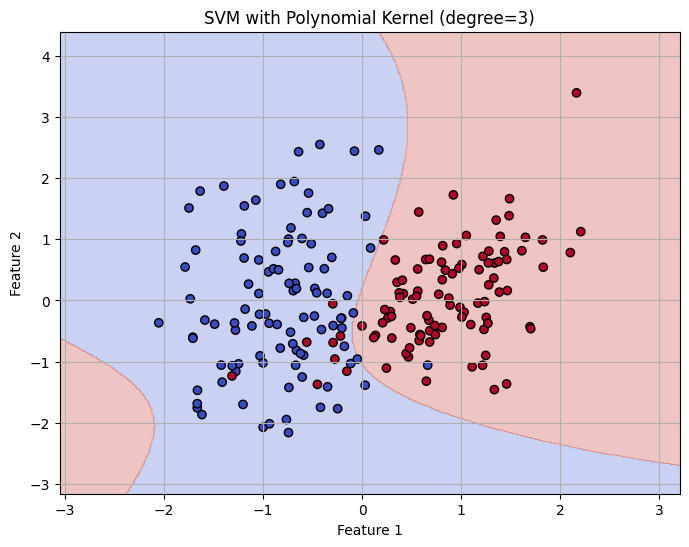

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Create a synthetic 2D classification dataset
X, y = make_classification(
    n_samples=200, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, class_sep=1.5, random_state=42
)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train an SVM classifier with a Polynomial kernel
svm_poly = SVC(kernel='poly', degree=3, C=1.0, coef0=1, gamma='auto')
svm_poly.fit(X, y)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)
Z = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("SVM with Polynomial Kernel (degree=3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


25. Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and
evaluate accuracy.

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train a Gaussian Naïve Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict on the test data
y_pred = gnb.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Gaussian Naïve Bayes classifier: {accuracy:.4f}")


Accuracy of Gaussian Naïve Bayes classifier: 0.9474


26. : Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20
Newsgroups dataset.

In [6]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the 20 Newsgroups dataset (subset for speed, optional)
categories = ['alt.atheism', 'sci.space', 'comp.graphics', 'talk.religion.misc']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    newsgroups.data, newsgroups.target, test_size=0.3, random_state=42
)

# Convert text data into bag-of-words features
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Multinomial Naïve Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train_vec, y_train)

# Predict and evaluate
y_pred = mnb.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of Multinomial Naïve Bayes classifier: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))


Accuracy of Multinomial Naïve Bayes classifier: 0.8181

Classification Report:
                    precision    recall  f1-score   support

       alt.atheism       0.71      0.80      0.75       224
     comp.graphics       0.92      0.92      0.92       297
         sci.space       0.86      0.85      0.85       307
talk.religion.misc       0.73      0.63      0.67       189

          accuracy                           0.82      1017
         macro avg       0.80      0.80      0.80      1017
      weighted avg       0.82      0.82      0.82      1017



27. Write a Python program to train an SVM Classifier with different C values and compare the decision
boundaries visually.

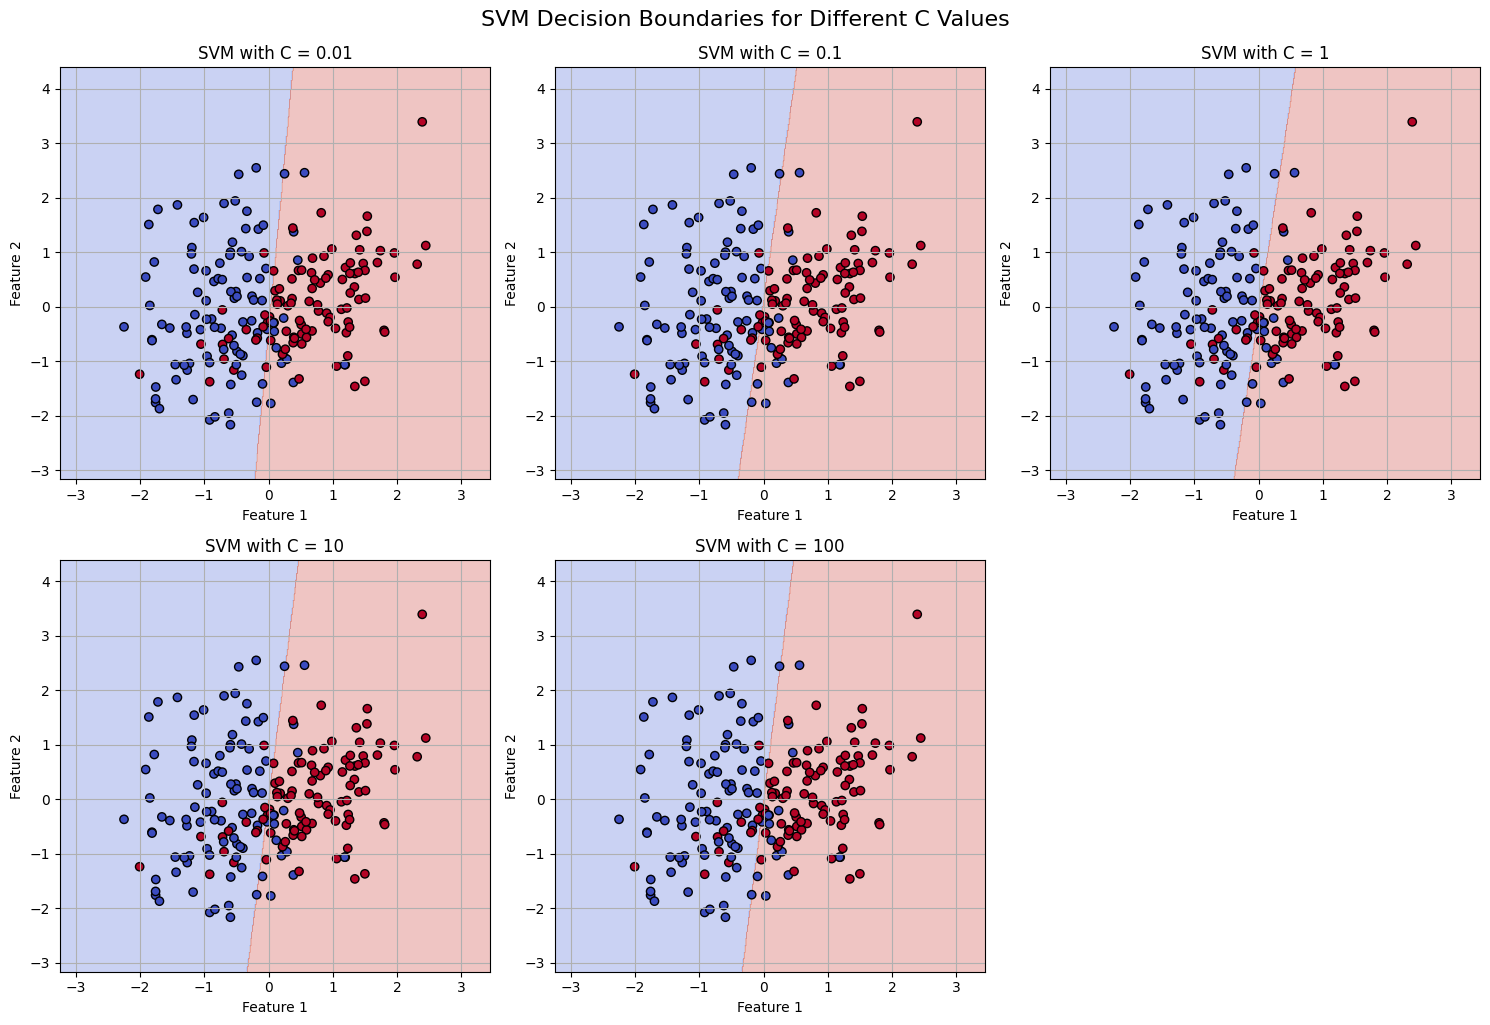

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Generate a synthetic 2D classification dataset
X, y = make_classification(
    n_samples=200, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, class_sep=1.0, random_state=42
)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Different C values to test
C_values = [0.01, 0.1, 1, 10, 100]

# Create a mesh grid for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Plot decision boundaries for different C values
plt.figure(figsize=(15, 10))
for i, C in enumerate(C_values, 1):
    clf = SVC(kernel='linear', C=C)
    clf.fit(X, y)

    # Predict on mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    plt.subplot(2, 3, i)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(f"SVM with C = {C}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)

plt.tight_layout()
plt.suptitle("SVM Decision Boundaries for Different C Values", fontsize=16, y=1.02)
plt.show()



28. = Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with
binary features.

In [8]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import Binarizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

# Generate a synthetic binary classification dataset
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,
    n_redundant=5,
    n_classes=2,
    random_state=42
)

# Binarize features (convert to 0/1)
binarizer = Binarizer(threshold=0.0)
X_binary = binarizer.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_binary, y, test_size=0.3, random_state=42
)

# Train Bernoulli Naïve Bayes classifier
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Predict and evaluate
y_pred = bnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of Bernoulli Naïve Bayes classifier: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy of Bernoulli Naïve Bayes classifier: 0.7633

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       160
           1       0.76      0.72      0.74       140

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



29.  Write a Python program to apply feature scaling before training an SVM model and compare results with
unscaled data.

In [9]:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ---- Train SVM on Unscaled Data ----
svm_unscaled = SVC(kernel='rbf', C=1.0)
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred_unscaled)

# ---- Scale Features ----
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---- Train SVM on Scaled Data ----
svm_scaled = SVC(kernel='rbf', C=1.0)
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

# ---- Print Results ----
print(f"Accuracy without scaling: {acc_unscaled:.4f}")
print(f"Accuracy with scaling   : {acc_scaled:.4f}")

if acc_scaled > acc_unscaled:
    print("✅ Feature scaling improved performance.")
elif acc_scaled < acc_unscaled:
    print("⚠️  Scaling decreased performance (unlikely).")
else:
    print("➖ No difference in accuracy.")


Accuracy without scaling: 0.9357
Accuracy with scaling   : 0.9766
✅ Feature scaling improved performance.


30.  Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and
after Laplace Smoothing.

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train Gaussian Naïve Bayes (no Laplace smoothing applicable)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of GaussianNB: {accuracy:.4f}")


Accuracy of GaussianNB: 0.9111


31. Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C,
gamma, kernel)

In [11]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Load dataset
data = load_wine()
X = data.data
y = data.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define parameter grid for GridSearch
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

# Initialize SVM model
svm = SVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(
    svm,
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Train with GridSearch
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       0.95      1.00      0.98        21
     class_2       1.00      0.93      0.97        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



32.  Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and
check it improve accuracy.

In [12]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Create an imbalanced dataset
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=2,
    n_redundant=10,
    n_clusters_per_class=1,
    weights=[0.9, 0.1],  # 90% of class 0, 10% of class 1
    flip_y=0,
    random_state=42
)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train SVM without class weighting
svm_no_weight = SVC(kernel='rbf', random_state=42)
svm_no_weight.fit(X_train, y_train)
y_pred_no_weight = svm_no_weight.predict(X_test)
acc_no_weight = accuracy_score(y_test, y_pred_no_weight)

# Train SVM with class weighting
svm_weighted = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_weighted.fit(X_train, y_train)
y_pred_weighted = svm_weighted.predict(X_test)
acc_weighted = accuracy_score(y_test, y_pred_weighted)

# Print results
print(f"Accuracy without class weighting: {acc_no_weight:.4f}")
print(classification_report(y_test, y_pred_no_weight))

print(f"\nAccuracy with class weighting: {acc_weighted:.4f}")
print(classification_report(y_test, y_pred_weighted))


Accuracy without class weighting: 0.9800
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       270
           1       1.00      0.80      0.89        30

    accuracy                           0.98       300
   macro avg       0.99      0.90      0.94       300
weighted avg       0.98      0.98      0.98       300


Accuracy with class weighting: 0.9633
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       270
           1       0.77      0.90      0.83        30

    accuracy                           0.96       300
   macro avg       0.88      0.94      0.91       300
weighted avg       0.97      0.96      0.96       300



33. Write a Python program to implement a Naïve Bayes classifier for spam detection using email data.

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load dataset from URL (SMS Spam Collection)
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
data = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# Map labels to binary
data['label_num'] = data.label.map({'ham': 0, 'spam': 1})

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    data.message, data.label_num, test_size=0.3, random_state=42, stratify=data.label_num
)

# Convert text to numeric features
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Multinomial Naïve Bayes classifier
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

# Predict on test set
y_pred = nb.predict(X_test_vec)

# Evaluate performance
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))



Accuracy: 0.9862

Classification Report:
              precision    recall  f1-score   support

         Ham       0.99      1.00      0.99      1448
        Spam       0.97      0.92      0.95       224

    accuracy                           0.99      1672
   macro avg       0.98      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672



34. Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and
compare their accuracy.

In [14]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
data = load_wine()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM classifier (with scaling)
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
acc_svm = accuracy_score(y_test, y_pred_svm)

# Train Gaussian Naïve Bayes (no scaling needed)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
acc_gnb = accuracy_score(y_test, y_pred_gnb)

# Print accuracies
print(f"SVM Classifier Accuracy: {acc_svm:.4f}")
print(f"Gaussian Naïve Bayes Accuracy: {acc_gnb:.4f}")


SVM Classifier Accuracy: 0.9815
Gaussian Naïve Bayes Accuracy: 1.0000


35. Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare
results.

In [15]:
from sklearn.datasets import load_wine
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Load dataset
data = load_wine()
X = data.data
y = data.target

# Scale features to non-negative for chi2
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Train Naïve Bayes on all features
gnb_all = GaussianNB()
gnb_all.fit(X_train, y_train)
y_pred_all = gnb_all.predict(X_test)
acc_all = accuracy_score(y_test, y_pred_all)

# Select top k features (e.g., 10)
k = 10
selector = SelectKBest(score_func=chi2, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train Naïve Bayes on selected features
gnb_sel = GaussianNB()
gnb_sel.fit(X_train_selected, y_train)
y_pred_sel = gnb_sel.predict(X_test_selected)
acc_sel = accuracy_score(y_test, y_pred_sel)

# Results
print(f"Accuracy with all features: {acc_all:.4f}")
print(f"Accuracy with top {k} features: {acc_sel:.4f}")


Accuracy with all features: 1.0000
Accuracy with top 10 features: 0.9444


36. Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO)
strategies on the Wine dataset and compare their accuracy.


In [16]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_wine()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Base SVM classifier
base_svm = SVC(kernel='rbf', gamma='scale', random_state=42)

# One-vs-Rest strategy
ovr = OneVsRestClassifier(base_svm)
ovr.fit(X_train_scaled, y_train)
y_pred_ovr = ovr.predict(X_test_scaled)
acc_ovr = accuracy_score(y_test, y_pred_ovr)

# One-vs-One strategy
ovo = OneVsOneClassifier(base_svm)
ovo.fit(X_train_scaled, y_train)
y_pred_ovo = ovo.predict(X_test_scaled)
acc_ovo = accuracy_score(y_test, y_pred_ovo)

# Print results
print(f"Accuracy with One-vs-Rest (OvR): {acc_ovr:.4f}")
print(f"Accuracy with One-vs-One (OvO): {acc_ovo:.4f}")


Accuracy with One-vs-Rest (OvR): 0.9815
Accuracy with One-vs-One (OvO): 0.9815


37. Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy.


In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define kernels to compare
kernels = ['linear', 'poly', 'rbf']
results = {}

for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train_scaled, y_train)
    y_pred = svm.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[kernel] = acc
    print(f"Accuracy with {kernel} kernel: {acc:.4f}")


Accuracy with linear kernel: 0.9825
Accuracy with poly kernel: 0.8947
Accuracy with rbf kernel: 0.9766


38. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the
average accuracy.

In [18]:
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

# Load dataset
data = load_wine()
X = data.data
y = data.target

# Define Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create an SVM pipeline with scaling + classifier
pipeline = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf', gamma='scale', random_state=42)
)

# Perform cross-validation
scores = cross_val_score(pipeline, X, y, cv=skf, scoring='accuracy')

# Print accuracy per fold and average accuracy
for i, score in enumerate(scores, 1):
    print(f"Fold {i} Accuracy: {score:.4f}")
print(f"\nAverage Accuracy: {np.mean(scores):.4f}")


Fold 1 Accuracy: 0.9444
Fold 2 Accuracy: 1.0000
Fold 3 Accuracy: 0.9722
Fold 4 Accuracy: 1.0000
Fold 5 Accuracy: 1.0000

Average Accuracy: 0.9833


39.  Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare
performance.

In [19]:
from sklearn.datasets import load_wine
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Wine dataset
data = load_wine()
X, y = data.data, data.target

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Different prior probabilities to try:
# None: Use empirical priors (class frequencies from training data)
# Uniform priors: equal probability to each class
# Custom priors: example with bias toward first class
priors_list = [
    None,                 # empirical priors (default)
    [1/3, 1/3, 1/3],     # uniform priors
    [0.7, 0.2, 0.1],     # custom biased priors
]

for idx, priors in enumerate(priors_list, 1):
    # Initialize GaussianNB with specified priors
    clf = GaussianNB(priors=priors)

    # Train the model
    clf.fit(X_train, y_train)

    # Predict on test set
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)

    prior_desc = "empirical (default)" if priors is None else priors
    print(f"Test {idx} - Priors: {prior_desc}")
    print(f"Accuracy: {acc:.4f}\n")


Test 1 - Priors: empirical (default)
Accuracy: 1.0000

Test 2 - Priors: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
Accuracy: 0.9815

Test 3 - Priors: [0.7, 0.2, 0.1]
Accuracy: 0.9815



40.  Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and
compare accuracy.

In [20]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
data = load_wine()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Feature scaling (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM with all features
svm_all = SVC(kernel='linear', random_state=42)
svm_all.fit(X_train_scaled, y_train)
y_pred_all = svm_all.predict(X_test_scaled)
acc_all = accuracy_score(y_test, y_pred_all)

# Recursive Feature Elimination with SVM as the estimator
# Select top k features (for example, half of total features)
k = X.shape[1] // 2
rfe = RFE(estimator=SVC(kernel='linear'), n_features_to_select=k)
rfe.fit(X_train_scaled, y_train)

# Transform train and test sets
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)

# Train SVM on selected features
svm_rfe = SVC(kernel='linear', random_state=42)
svm_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = svm_rfe.predict(X_test_rfe)
acc_rfe = accuracy_score(y_test, y_pred_rfe)

# Print results
print(f"Accuracy with all features: {acc_all:.4f}")
print(f"Accuracy with top {k} features (RFE): {acc_rfe:.4f}")


Accuracy with all features: 0.9630
Accuracy with top 6 features (RFE): 0.9444


41.  Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and
F1-Score instead of accuracy.

In [21]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load dataset
data = load_wine()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM classifier
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = svm.predict(X_test_scaled)

# Print precision, recall, and F1-score
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=data.target_names))


Classification Report:

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       0.95      1.00      0.98        21
     class_2       1.00      0.93      0.97        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



42.  Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss
(Cross-Entropy Loss).

In [22]:
from sklearn.datasets import load_wine
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

# Load dataset
data = load_wine()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Feature scaling (optional for Naïve Bayes, but can help)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Gaussian Naïve Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

# Predict probabilities on test set
y_prob = gnb.predict_proba(X_test_scaled)

# Calculate log loss (cross-entropy loss)
loss = log_loss(y_test, y_prob)

print(f"Log Loss (Cross-Entropy Loss): {loss:.4f}")


Log Loss (Cross-Entropy Loss): 0.0233


43. Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn.

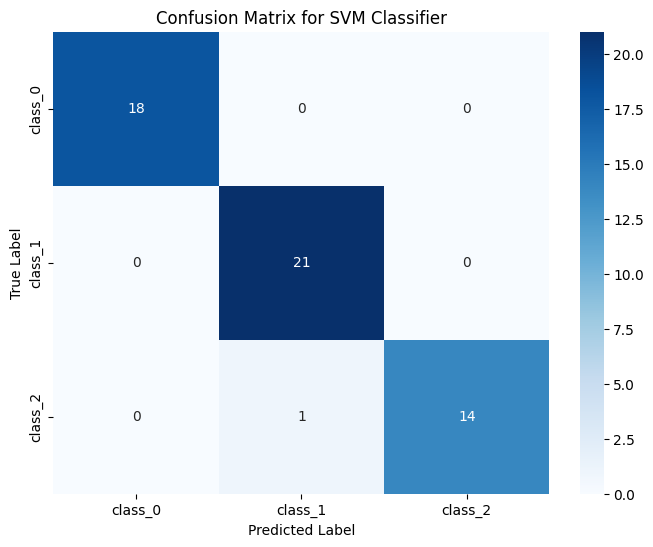

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Load dataset
data = load_wine()
X = data.data
y = data.target
class_names = data.target_names

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM classifier
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_scaled, y_train)

# Predict test set
y_pred = svm.predict(X_test_scaled)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with seaborn heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()


44. Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute
Error (MAE) instead of MSE.

In [24]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# Load California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale features (important for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = svr.predict(X_test_scaled)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Mean Absolute Error (MAE): 0.3972


45. Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC
score.

ROC-AUC Score: 0.9892


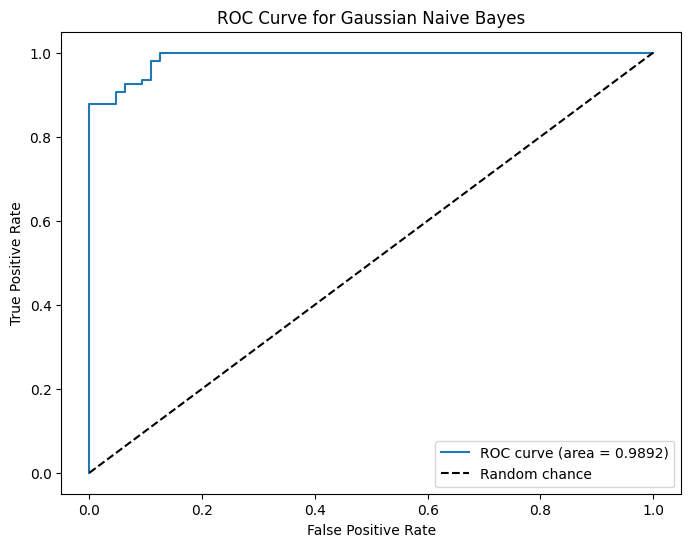

In [25]:
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load Breast Cancer dataset (binary classification)
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale features (optional but helpful)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

# Predict probabilities for positive class
y_prob = gnb.predict_proba(X_test_scaled)[:, 1]

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Optional: plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gaussian Naive Bayes')
plt.legend(loc='lower right')
plt.show()


46. Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.

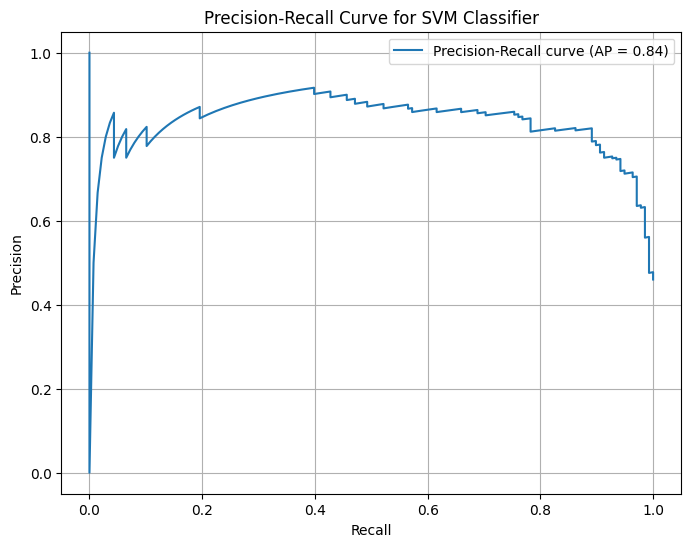

In [26]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Load example dataset (binary classification)
X, y = datasets.make_classification(n_samples=1000, n_features=20, n_classes=2,
                                    n_informative=2, n_redundant=10,
                                    random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM classifier with probability=True to get decision function
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train, y_train)

# Predict probabilities for the positive class
y_scores = svm.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Calculate average precision score
avg_precision = average_precision_score(y_test, y_scores)

# Plot Precision-Recall curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM Classifier')
plt.legend()
plt.grid()
plt.show()
